Notebook purpose

- Explore entropy scores

In [151]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('/Users/fgu/dev/projects/entropy')
from entropy import config
import entropy.helpers.aws as aws
import entropy.data.cleaners as cl
import entropy.data.creators as cr
import entropy.figures.figures as figs

sns.set_style('whitegrid')
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [111]:
SAMPLE = 'X77'
fp = f'~/tmp/entropy_{SAMPLE}.parquet'

df = aws.read_parquet(fp)
df.head(2)

,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,savings,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,entropy_tag_auto,entropy_tag
0,688261,2012-01-03,777,400.00,mdbremoved,NaN,transfers,transfers,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-11-13,True,364.220001,non merchant mbl,False,transfers,other account,other account,u,201201,-1542.99646,24319.220881,4.83494,2.880975
1,688264,2012-01-03,777,10.27,9572 30dec 11 mcdonalds restaurant winwick road gb,mcdonalds,spend,services,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2015-03-19,True,364.220001,mcdonalds,False,dining and drinking,NaN,dining and drinking,u,201201,-1542.99646,24319.220881,4.83494,2.880975


## User-level entropy

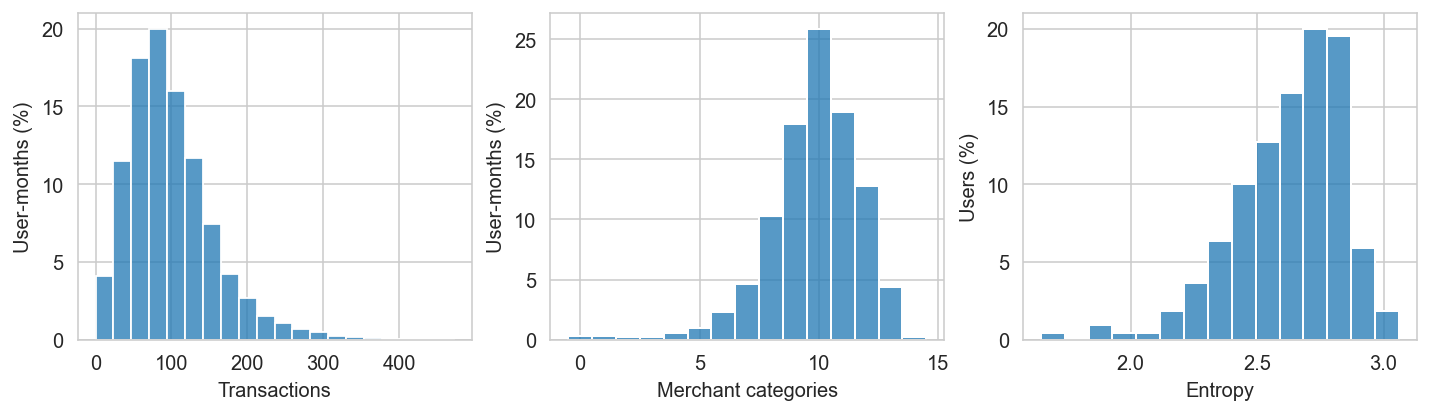

In [172]:
import functools

def txns_mc_entropy_distributions(df):
    """Plots distributions of user-month txns and merchant categories, and entropy."""

    hist = functools.partial(sns.histplot, stat='percent')
    g = df.set_index('date').groupby('user_id')    
    fig, ax = plt.subplots(1, 3, figsize=(12, 3))

    data = g.resample('M').id.count()
    hist(data=data, bins=20, ax=ax[0])
    ax[0].set(xlabel='Transactions', ylabel='User-months (%)')    

    data = g.resample('M').tag.nunique()
    bins = np.arange(df.tag.nunique() + 1) - 0.5
    hist(data=data, bins=bins, ax=ax[1])
    ax[1].set(xlabel='Merchant categories', ylabel='User-months (%)')
    
    data = g.entropy_tag.first()
    hist(data=data, bins=15)
    ax[2].set(xlabel='Entropy', ylabel='Users (%)')

txns_distributions(df)

## User-time level entropy